In [29]:
pip install matplotlib

  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)



In [30]:
import csv
import glob
import os
from bokeh.plotting import figure, output_file, show
import pandas as pd
from pandas import DataFrame
import numpy as np  
import matplotlib
 



## read all csv files, covid daily reports frm April 12th to Augest 20th

#os.chdir("C:\\Users\\Robin\\Documents\\Gatech\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_daily_reports_us")

#extension = "csv"

#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')
combined_csv = pd.read_csv (r'combined_csv.csv')



In [ ]:
# I only want to look at the situation in New York, TX, and MA

In [39]:
# filter all the other states data out
States = ["New York", "Texas", "Massachusetts"]
df = combined_csv[combined_csv.Province_State.isin(States)]
April = df[df.Last_Update.str.contains("-04-")]
May = df[df.Last_Update.str.contains("-05-")]
June = df[df.Last_Update.str.contains("-06-")]
July = df[df.Last_Update.str.contains("-07-")]
August = df[df.Last_Update.str.contains("-08-")]

ny_df = df[df.Province_State.str.contains("New York")]

tx_df = df[df.Province_State.str.contains("Texas")]

ma_df = df[df.Province_State.str.contains("Massachusetts")]


In [38]:
df['Last_Update'] = pd.to_datetime(df['Last_Update'])
#df['date'] = df['Last_Update'].dt.date

<ipython-input-38-5bac4dc9ee26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last_Update'] = pd.to_datetime(df['Last_Update'])


c:\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Province_State
Massachusetts    AxesSubplot(0.125,0.125;0.775x0.755)
New York         AxesSubplot(0.125,0.125;0.775x0.755)
Texas            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Confirmed, dtype: object

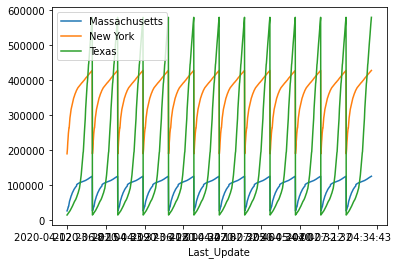

In [33]:
df.set_index('Last_Update', inplace=True)
df.groupby('Province_State')['Confirmed'].plot(legend=True)
